# Analysis of Ford Go Bike trip duration in 2018
## by Dmitrij Burlak

## Investigation Overview

The main insights I want to provide in the following slides are about the trips of Ford Go Bike users for the year 2018: 

Especially the answers to: 
- How long does the average trip take? 
- Does trip duration depend on if a user is a subscriber or customer 
- How are locations influencing the trip duration?

## Dataset Overview

What is the structure of your dataset?
There are 1740396 rides in the dataset with 24 anonymized features

Trip Duration (seconds)
Start Time and Date
End Time and Date
Start Station ID
Start Station Name
Start Station Latitude
Start Station Longitude
End Station ID
End Station Name
End Station Latitude
End Station Longitude
Bike ID
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
Member Year of Birth
Member Gender
Dreived features

User Age
Start Daytime
End Daytime
Start Weekday
End Weekday
Start Month
Path

Most variables are categorical in nature, but the variables duration and age are numeric variables. The ordinal variable user_type, start_month, start/end_weekday are ordered with the following levels:

User Type: Customer -> Subscriber Start/End Daytime: 'morning' ->'afternoon' -> 'evening' -> 'night'

Start/End Weekday: 0 -> ... -> 7

Start Month: 1 -> ... -> 12

In [109]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [110]:
# load in the dataset into a pandas dataframe
rides = pd.read_csv('data/rides_all_explored.csv')

## Average trip duration in 2018

The distribution of durations in 2018 is strongly skewed to the right. 99% of all rides are shorter than 64 min. And 50% are using the bike even less then 10 min in a row. The longest ride though is about 24 hours.

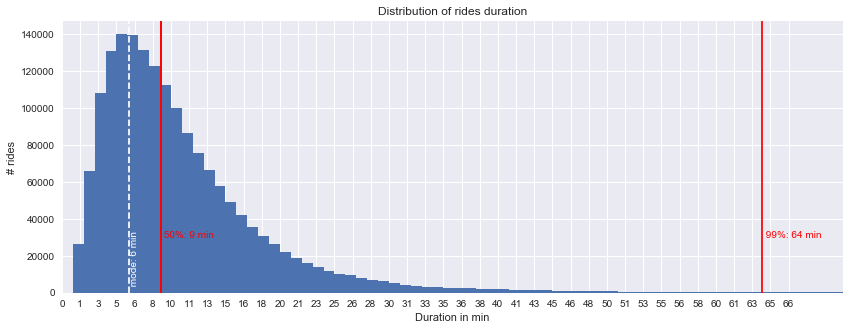

In [111]:
# How long does the average trip take/ start with a standard hist plot of ride duration
binsize = 60
bins = np.arange(0, rides['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[14, 5])
plt.hist(data = rides, x = 'duration_sec', bins = bins)
plt.xlabel('Duration in min')
xticks = np.arange(0,4000+100, 100)
xticksl= [int(x/60) for x in xticks]
plt.xticks(xticks,xticksl)
plt.xlim(0,4300)
plt.ylabel('# rides')
plt.axvline(rides.duration_sec.median(), color='r')


## The 99% line
uperPercentile = rides.duration_sec.quantile(0.99)
plt.axvline(uperPercentile, color='r')
plt.text(x=uperPercentile+2, y=30e3, s=' 99%: {} min'.format(int(uperPercentile/60)), color='r')

## The 50% line
median=rides.duration_sec.median()
plt.axvline(median, color='r')
plt.text(x=median+2, y=30e3, s=' 50%: {} min'.format(int(median/60)), color='r')

## The mode line
mode=rides.duration_sec.mode()[0]
plt.axvline(mode, color='w',  linestyle='--')
plt.text(x=mode+2, y=30e3, s=' mode: {} min'.format(int(mode/60)), color='w', rotation=90)

plt.title('Distribution of rides duration')
plt.show()

## Amount of rides per user type in 2018

The amount of rides per type in 2018 are clearly separated: 90% of the users are the type subscriber and only about 10% of type customer. 

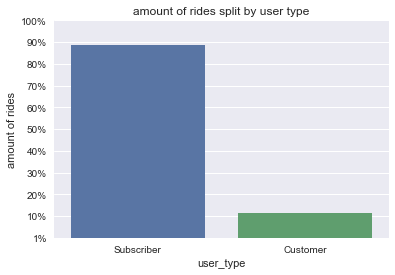

In [112]:
#General ratio between user types
sns.countplot(data=rides, x = 'user_type');

step = len(rides) // 10
yticks = np.arange(0,len(rides), step);
yticksl =  ['{}%'.format(int(x*100 + 1)) for x in (yticks / len(rides))]
plt.yticks(yticks, yticksl);
plt.ylabel('amount of rides');
plt.xlabel('user type');
plt.title('amount of rides split by user type');

## The ride duration per user type

Subscriber use the bikes in average shorter than Customer.

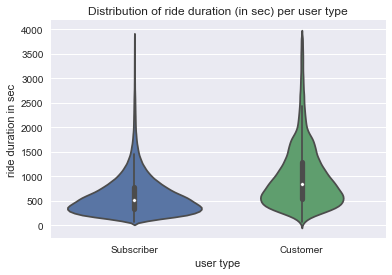

In [113]:
#kde over types showing each destribution
per_99=rides[rides.duration_sec < 3865]
sns.violinplot(data=per_99, x='user_type', y='duration_sec')

plt.title('Distribution of ride duration (in sec) per user type');
plt.xlabel('user type')
plt.ylabel('ride duration in sec');

## Lets get an overview of locations in the dataset

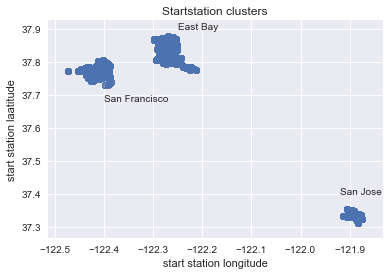

In [114]:
# show the location clusters with namings of the locations
plt.scatter(data =rides, y='start_station_latitude' , x='start_station_longitude', alpha=0.01);
plt.text(x=-122.4, y =37.68, s = 'San Francisco')
plt.text(x=-122.25, y = 37.9, s = 'East Bay')
plt.text(x=-121.92, y = 37.4, s = 'San Jose');
plt.xlabel('start station longitude');
plt.ylabel('start station laatitude');
plt.title('Startstation clusters');

## Development of the average ride durations for time of the day per location per month
In general we can observe that the average duration in San Fan area is slightly higher than the one of all the others. Surprisingly also the development during the day is for every month and for every location different.

In [115]:
#helper function to map number to month
def numToMonth(numMonth):
    months=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    assert numMonth >= 0 and  numMonth <= 12
    
    return months[numMonth] 

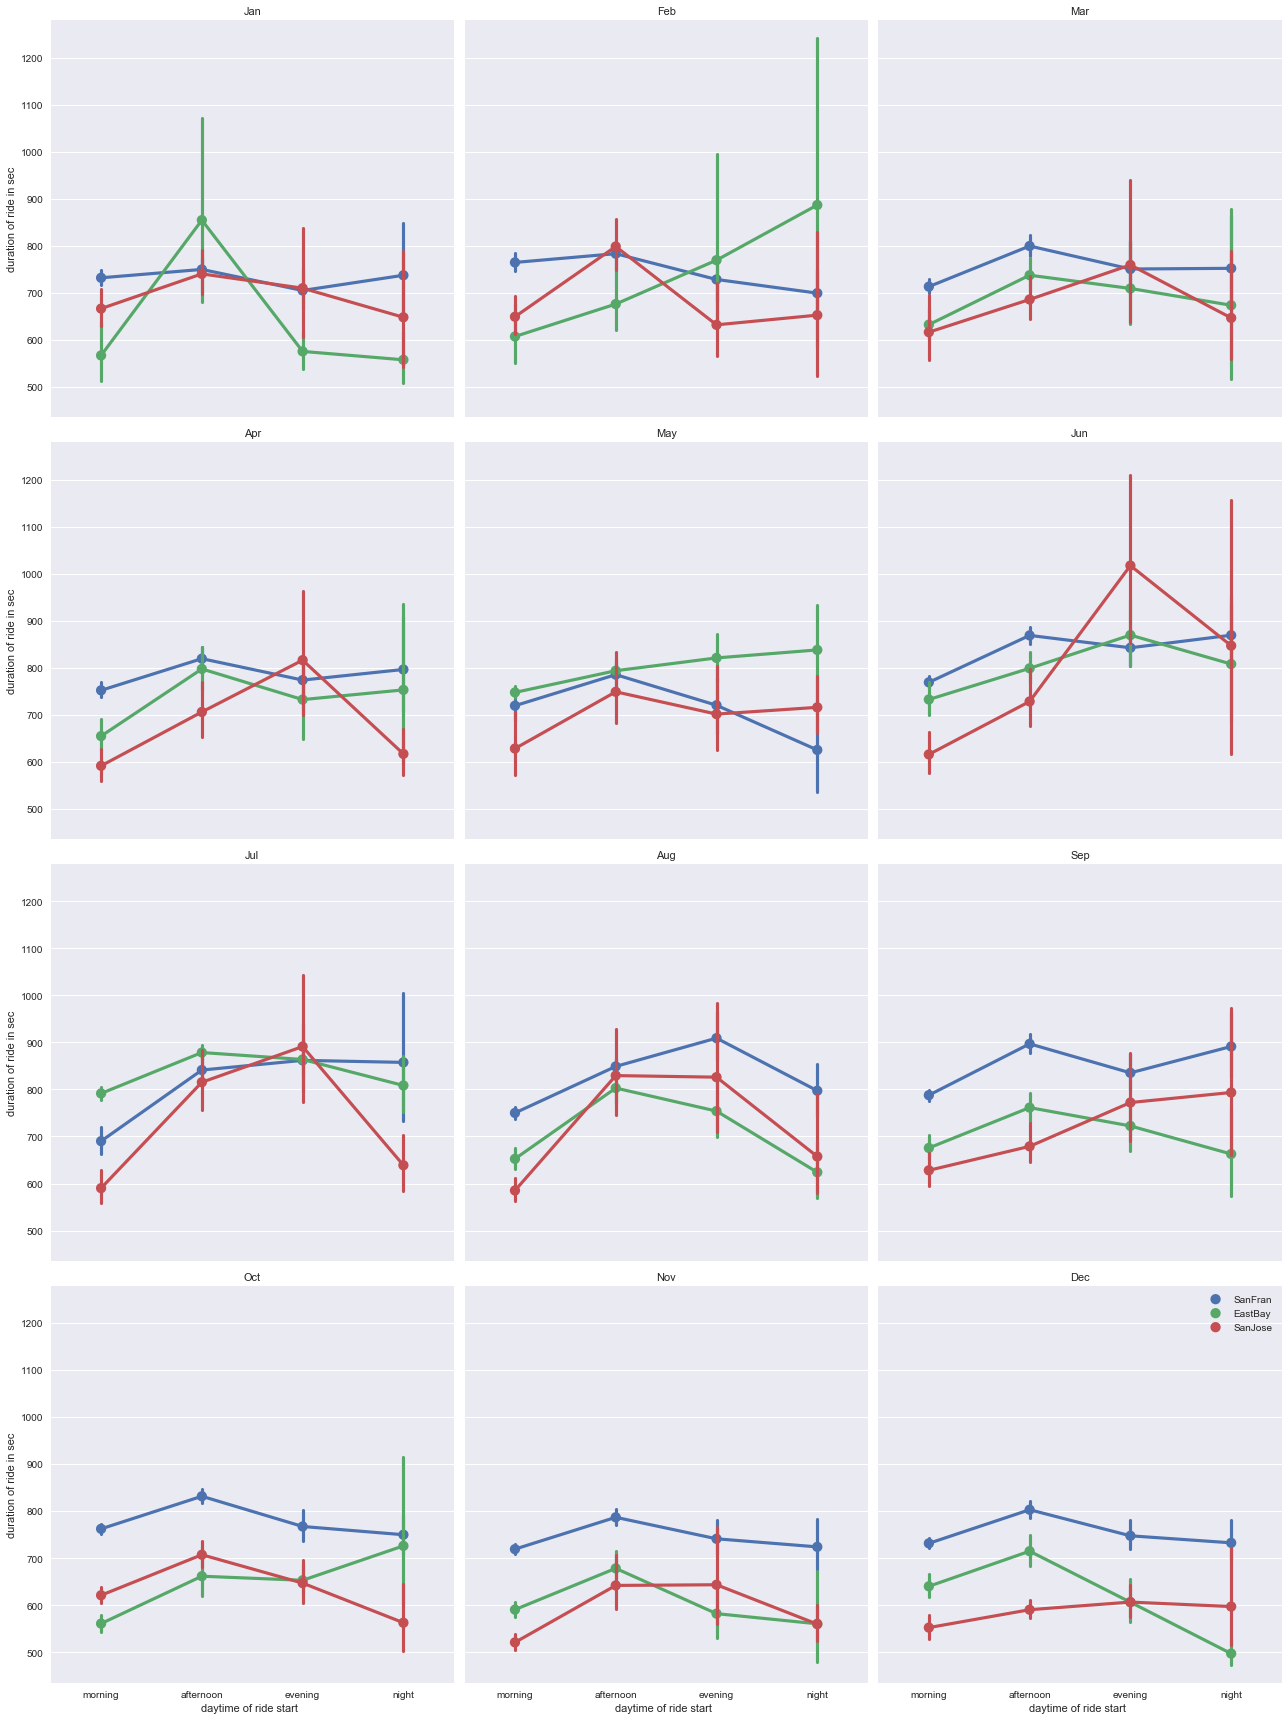

In [116]:
# month vs (start station id counts as hist), separated by location

hueOrd=rides.location.value_counts().index.values
time_order = ['morning', 'afternoon', 'evening', 'night'] 

g = sns.FacetGrid(data = rides, col = 'start_month', col_wrap=3,size=6, hue_order=hueOrd)
g.map(sns.pointplot, 'start_daytime', 'duration_sec', 'location', order = time_order, palette = sns.color_palette()[0:3])
plt.legend()

#nicer axis labels
g.set_axis_labels(x_var='daytime of ride start  ', y_var='duration of ride in sec')
#mapping month number to readable str
axs = g.axes.flatten()
for i in range(len(axs)):
    ax = axs[i]
    ax.title.set_text(numToMonth(i))